In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [2]:
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = mnist.load_data()
 # reshape dataset to have a single channel
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [3]:
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [4]:
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu',  padding='same', input_shape=(28,28 , 1)))

 model.add(MaxPooling2D((2, 2)))

 model.add(Conv2D(32, (3, 3), activation='relu',  padding='same'))
 model.add(MaxPooling2D((2, 2)))

 model.add(Conv2D(32, (3, 3), activation='relu',  padding='same'))
 model.add(MaxPooling2D((2, 2)))

 model.add(Flatten())
 model.add(Dense(128, activation='relu'))
 model.add(Dense(10, activation='softmax'))

 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [5]:
def evaluate_model(dataX, dataY, n_folds=5):
 scores, histories = list(), list()
 # prepare cross validation
 kfold = KFold(n_folds, shuffle=True, random_state=1)
 # enumerate splits
 for train_ix, test_ix in kfold.split(dataX):
  # define model
  model = define_model()
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model.fit(trainX, trainY, epochs=15, batch_size=32, validation_data=(testX, testY))
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # stores scores
  scores.append(acc)
  histories.append(history)
 return scores, histories

In [6]:
def summarize_diagnostics(histories):
 for i in range(len(histories)):
 # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

In [7]:
# summarize model performance
def summarize_performance(scores):
 # print summary
 print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
 # box and whisker plots of results
 plt.boxplot(scores)
 plt.show()


In [8]:
def run_test_harness():
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # evaluate model
 scores, histories = evaluate_model(trainX, trainY)
 # learning curves
 summarize_diagnostics(histories)
 # summarize estimated performance
 summarize_performance(scores)

Epoch 1/15
1500/1500 [==============================] - 17s 7ms/step - loss: 0.2354 - accuracy: 0.9234 - val_loss: 0.0943 - val_accuracy: 0.9698
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0622 - accuracy: 0.9800 - val_loss: 0.0730 - val_accuracy: 0.9762
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0526 - val_accuracy: 0.9833
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0441 - val_accuracy: 0.9871
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0609 - val_accuracy: 0.9825
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0210 - accuracy: 0.9924 - val_loss: 0.0441 - val_accuracy: 0.9873
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0646 - val_accuracy

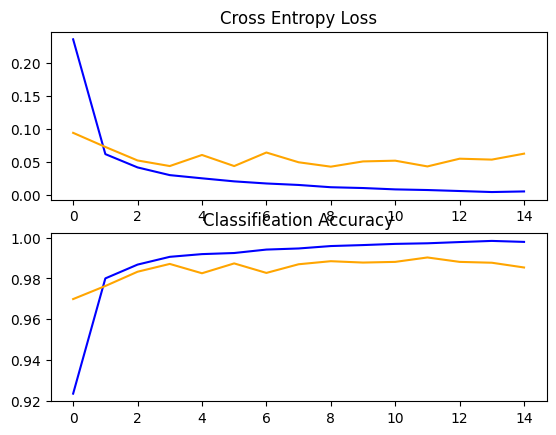

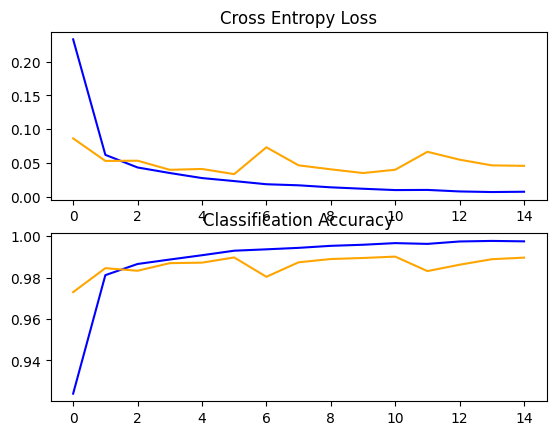

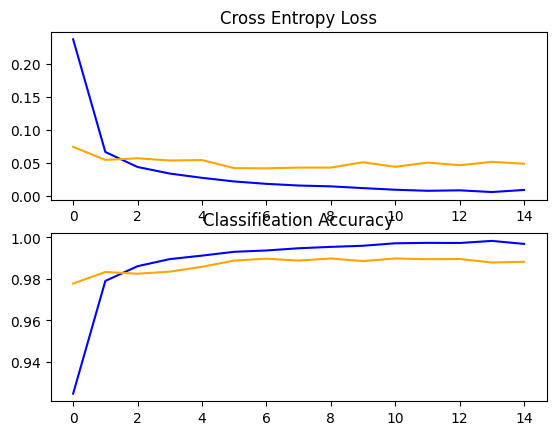

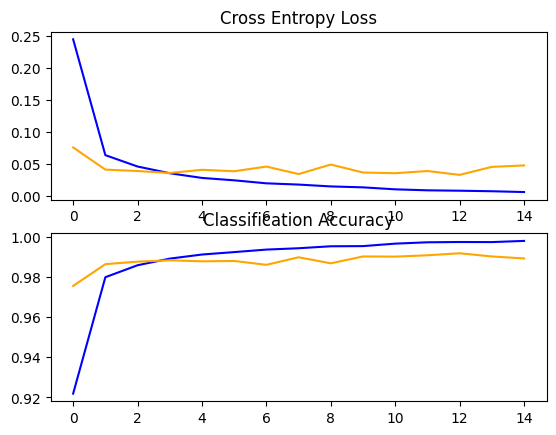

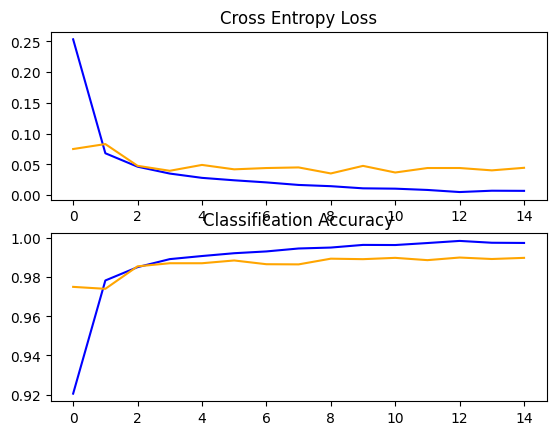

Accuracy: mean=98.847 std=0.167, n=5


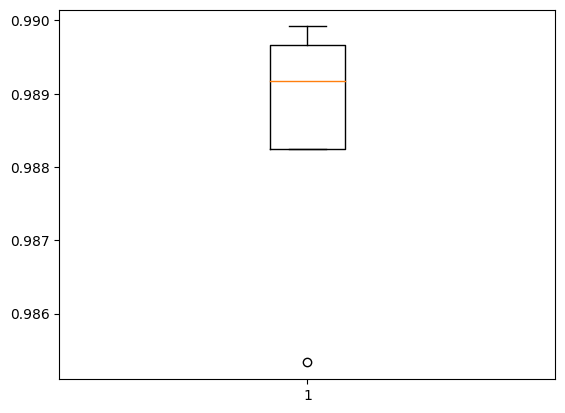

In [9]:
run_test_harness()

**How to Develop an Improved Model**
## Applying Batch Normalization

In [10]:
# cnn model with batch normalization for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [11]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


In [12]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [13]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [19]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=15, batch_size=32, validation_data=(testX, testY))
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [20]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()


In [21]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [22]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

Epoch 1/15
1500/1500 [==============================] - 10s 5ms/step - loss: 0.1381 - accuracy: 0.9576 - val_loss: 0.0793 - val_accuracy: 0.9765
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0521 - accuracy: 0.9839 - val_loss: 0.0679 - val_accuracy: 0.9798
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0592 - val_accuracy: 0.9822
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0575 - val_accuracy: 0.9828
Epoch 5/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0144 - accuracy: 0.9961 - val_loss: 0.0507 - val_accuracy: 0.9853
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0554 - val_accuracy: 0.9831
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.0575 - val_accuracy

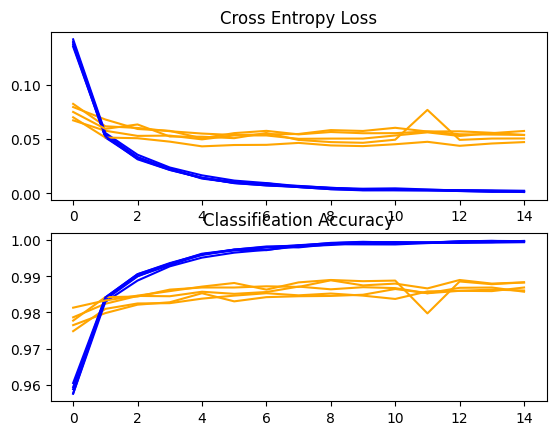

Accuracy: mean=98.708 std=0.109, n=5


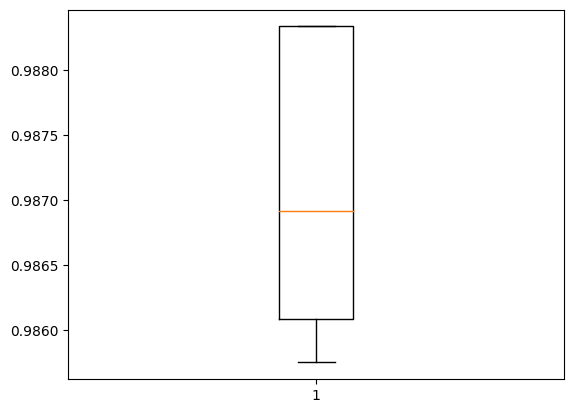

In [23]:
# entry point, run the test harness
run_test_harness()